## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df = pd.read_csv("E:/internship_datasets/Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


## Data Understanding & Cleaning

In [276]:
df.shape

(128976, 21)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [278]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [279]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [280]:
df = df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], how='all')

In [281]:
df.columns = (df.columns.str.strip().str.lower().str.replace(' ','_'))

In [282]:
df.columns = (df.columns.str.replace('-','_'))

In [283]:
df["ship_city"] = df["ship_city"].str.strip().str.title()

In [284]:
df["ship_state"] = df["ship_state"].str.title()

In [285]:
df["ship_state"] = df["ship_state"].replace({"Pb" : "Punjab", "Orissa" : "Odisha"})

In [286]:
df['ship_state'] = df['ship_state'].str.replace(r'^Punjab.*', 'Punjab', regex=True)

In [287]:
df["ship_state"] = df["ship_state"].replace({"Ar" : "Arunachal Pradesh","Nl" : "Nagaland","Pondicherry" : "Puducherry",
                "Rj" :"Rajasthan","Rajshthan" : "Rajasthan","Rajsthan" : "Rajasthan"})

In [288]:
df[["amount","fulfilled_by"]] = df[["amount","fulfilled_by"]] .replace(' ',np.nan)

In [289]:
df["fulfilled_by"] = df["fulfilled_by"].fillna('Amazon')

In [290]:
df.drop(columns=['index','new', 'currency','pendings'],inplace=True)

In [292]:
df["date"] = pd.to_datetime(df["date"],errors='coerce')

In [293]:
df["ship_postal_code"] = df["ship_postal_code"].astype(int)

In [294]:
# Changing all the qty to 0 where status is Cancelled
df.loc[df['status'] == 'Cancelled', 'qty'] = 0

In [295]:
# Changing all the qty to 0 where status is cancelled 
df.loc[df['status'] == 'Cancelled', 'amount'] = 0

# Calculate mean of valid (non-zero, non-NaN) Amounts
mean_amount = df.loc[(df['status'] != 'Cancelled') & (df['amount'] > 0), 'amount'].mean()

# Replace NaN or 0 in Amount where Status is not Cancelled
mask = (df['status'] != 'Cancelled') & ((df['amount'].isna()) | (df['amount'] == 0))
df.loc[mask, 'amount'] = mean_amount

In [296]:
df["amount"] = df["amount"].astype(int)

In [297]:
df.dtypes

order_id                      object
date                  datetime64[ns]
status                        object
fulfilment                    object
sales_channel                 object
ship_service_level            object
category                      object
size                          object
courier_status                object
qty                            int64
amount                         int64
ship_city                     object
ship_state                    object
ship_postal_code               int64
ship_country                  object
b2b                             bool
fulfilled_by                  object
dtype: object

In [298]:
df[["qty","amount"]].describe()

,qty,amount
count,128941.000000,128941.000000
mean,0.860564,568.937661
std,0.362399,338.337801
min,0.000000,0.000000
25%,1.000000,387.000000
50%,1.000000,563.000000
75%,1.000000,760.000000
max,15.000000,5584.000000


In [299]:
df.describe(include='object')

,order_id,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,ship_city,ship_state,ship_country,fulfilled_by
count,128941,128941,128941,128941,128941,128941,128941,128941,128941,128941,128941,128941
unique,120201,13,2,2,2,9,11,4,7291,38,1,2
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,Bengaluru,Maharashtra,IN,Amazon
freq,12,77797,89691,128817,88608,50280,22366,109458,11889,22272,128941,89691


In [300]:
mapping = {
    'Cancelled': 'Cancelled',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Pending',
    'Shipped': 'Shipped',
    'Shipped - Damaged': 'Returned/Damaged',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Shipped - Lost in Transit': 'Returned/Damaged',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Rejected by Buyer': 'Returned/Damaged',
    'Shipped - Returned to Seller': 'Returned/Damaged',
    'Shipped - Returning to Seller': 'Returned/Damaged',
    'Shipping': 'Shipped'
}

df['status'] = df['status'].map(mapping)

In [267]:
def cov(row):
    if row == False:
        return 'No'
    else:
        return 'Yes'

df["b2b"] = df["b2b"].apply(cov)

## Outlier Detection

In [301]:
# 11. Outliers Detection
def iqr_bounds(s):
    q1, q3 = s.quantile([.25,.75])
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

for col in ['amount']:
    lo, hi = iqr_bounds(df[col])
    outliers = ((df[col] < lo) | (df[col] > hi)).mean()
    outliers
    print(col, "outlier rate:", round(outliers*100,2), "%")

amount outlier rate: 2.2 %


In [302]:
# Get bounds
q1, q3 = df['amount'].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

# Filter outliers
outliers = df[(df['amount'] < lower) | (df['amount'] > upper)]
print("Outliers count:", len(outliers))

Outliers count: 2839


## Feature Engineering

In [303]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day_name"] = df["date"].dt.day_name()

In [168]:
mapping = {
    'Saturday' : 'Weekend',
    'Sunday' : 'Weekend',
    'Monday' : 'Weekday',
    'Tuesday' : 'Weekday',
    'Wednesday' : 'Weekday',
    'Thursday' : 'Weekday',
    'Friday' : 'Weekday'
}

df["weekend_weekday"] = df["day_name"].map(mapping)

## Univariate Analysis

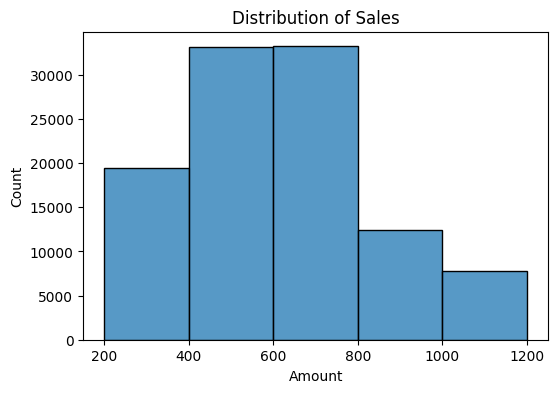

In [169]:
# clipping the outliers for clear visuals
df_vis = df.copy()
df_vis['amount_clipped'] = df['amount'].clip(upper=upper)
df_vis = df_vis[df_vis["amount_clipped"] > 0]

# Distribution of Amount
plt.figure(figsize=(6,4))
sns.histplot(x='amount_clipped',data=df_vis,bins=[200,400,600,800,1000,1200])
plt.title("Distribution of Sales")
plt.xlabel("Amount")
plt.show()

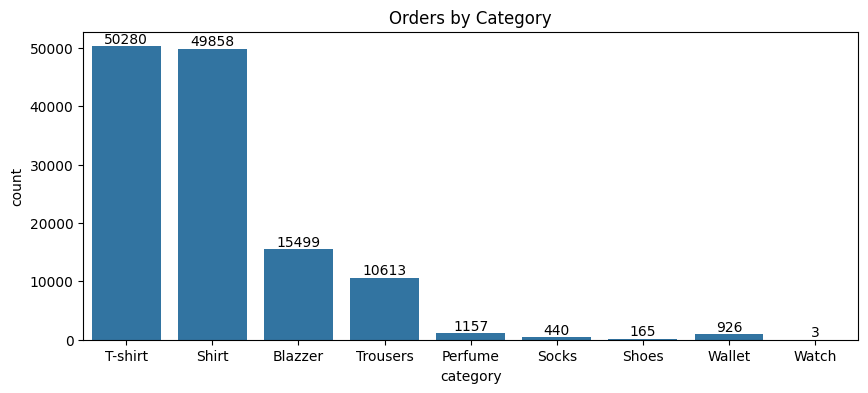

In [170]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="category",data=df)
plt.title("Orders by Category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

***T-shirts and Shirt are the most frequently ordered product categories, contributing the highest number of orders in the dataset***

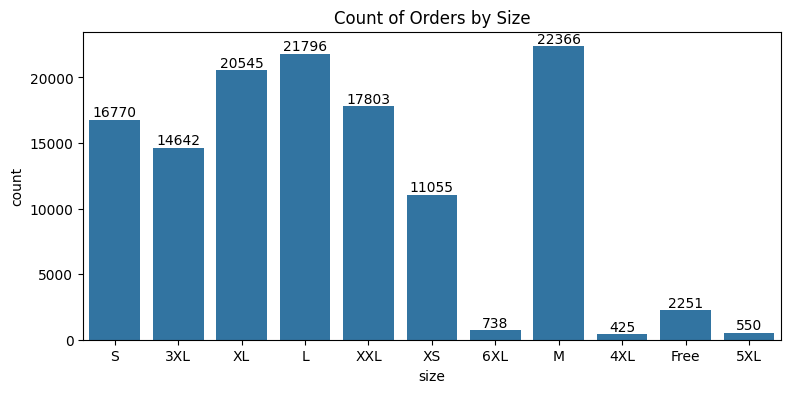

In [171]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="size",data=df)
plt.title("Count of Orders by Size")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

***Size M, L, XL is the most preferred product sizes among customers, contributing the highest number of orders compared to other sizes***

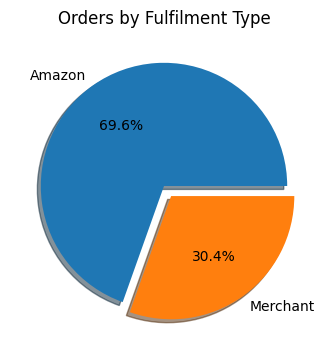

In [207]:
fulfil_counts = df['fulfilment'].value_counts()

# Create pie chart
plt.figure(figsize=(5,4))
plt.pie(fulfil_counts, labels=fulfil_counts.index, autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('Orders by Fulfilment Type')
plt.show()

***From the above pie chart we can see that most of the orders are fulfiled by Amazon***

In [212]:
df["b2b"].value_counts()

b2b
No     128069
Yes       872
Name: count, dtype: int64

***The sales on Amazon are primarily driven by retail (B2C) customers, while business (B2B) customers contribute a very small share (0.7%) of total orders***

## Bivariate Analysis

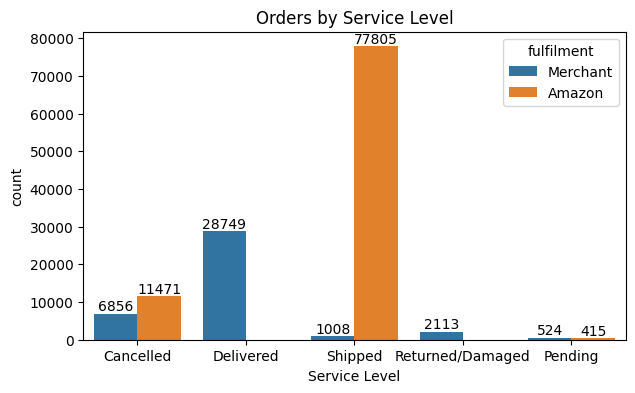

In [185]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x='status',data=df,hue="fulfilment")
plt.title("Orders by Service Level")
plt.xlabel("Service Level")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

***Orders fulfilled by Amazon have a much higher shipped count but also slightly more cancellations, while Merchant fulfilled orders show more delivered orders***

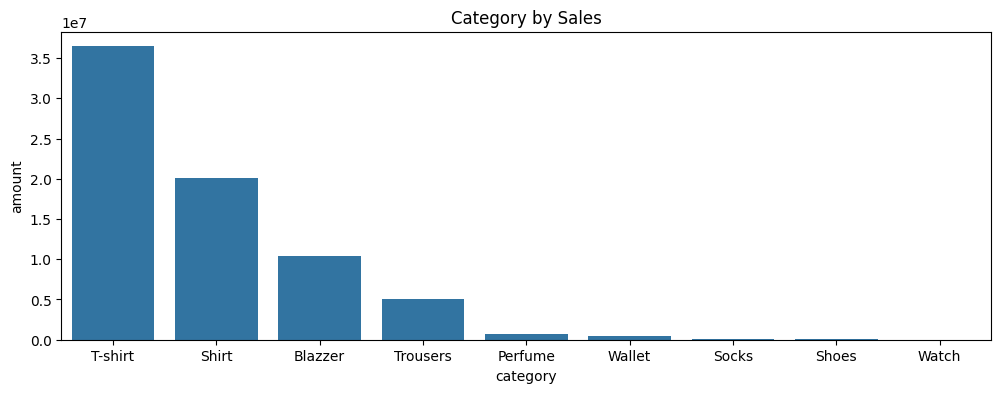

In [186]:
sales_cat = df.groupby(["category"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x="category",y="amount",data=sales_cat)
plt.title("Category by Sales")
plt.show()

***T-shirts generate higher total sales revenue than Shirts, indicating that T-shirts are more profitable despite similar order volumes***

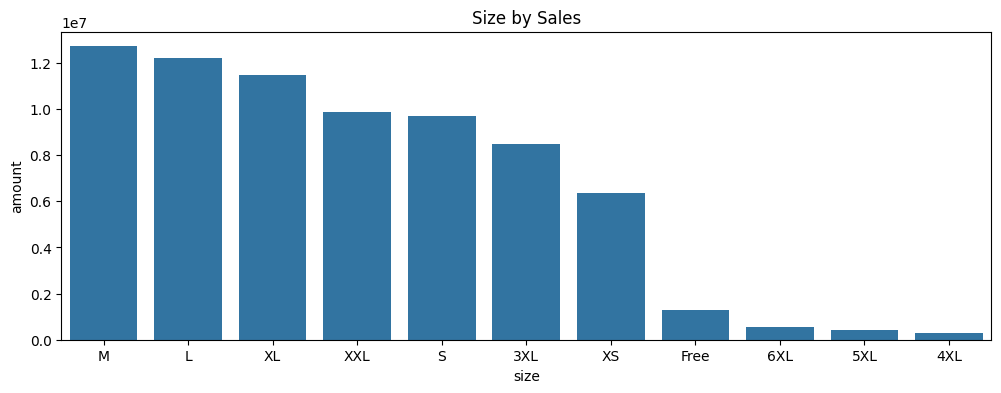

In [188]:
sales_state = df.groupby(["size"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x="size",y="amount",data=sales_state)
plt.title("Size by Sales")
plt.show()

***Among all product sizes, Size M, L, XL generates the highest total sales revenue, making it the most profitable size***

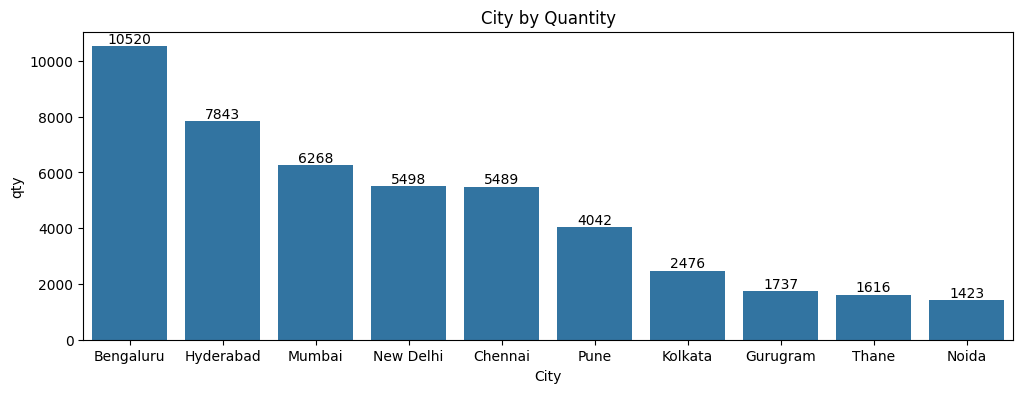

In [219]:
orders_city = df.groupby(["ship_city"], as_index =False)["qty"].sum().sort_values(by="qty",ascending=False).head(10)
plt.figure(figsize=(12,4))
ax = sns.barplot(x ='ship_city',y ='qty', data = orders_city)
plt.title('City by Quantity')
plt.xlabel('City')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

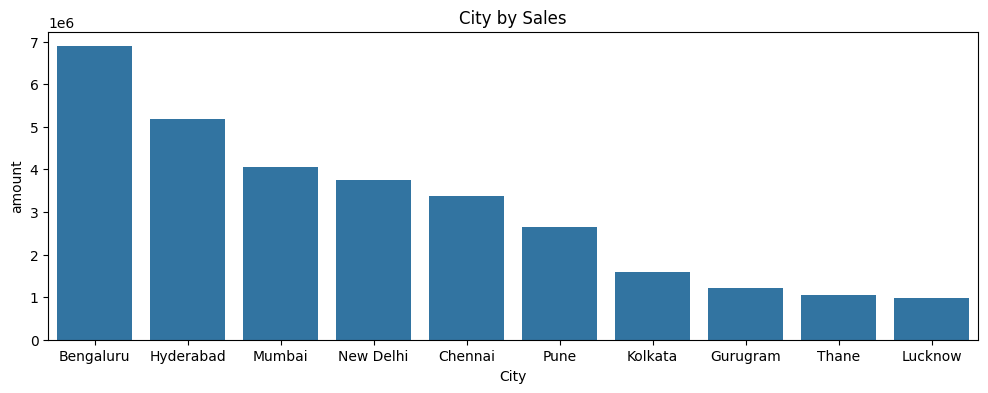

In [215]:
sales_city = df.groupby(["ship_city"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False).head(10)
plt.figure(figsize=(12,4))
sns.barplot(x="ship_city",y="amount",data=sales_city)
plt.title("City by Sales")
plt.xlabel("City")
plt.show()

***From the above graphs we can see that Bengaluru, Hyderabad, and Mumbai lead in both sales quantity and revenue, making them the top-performing cities***

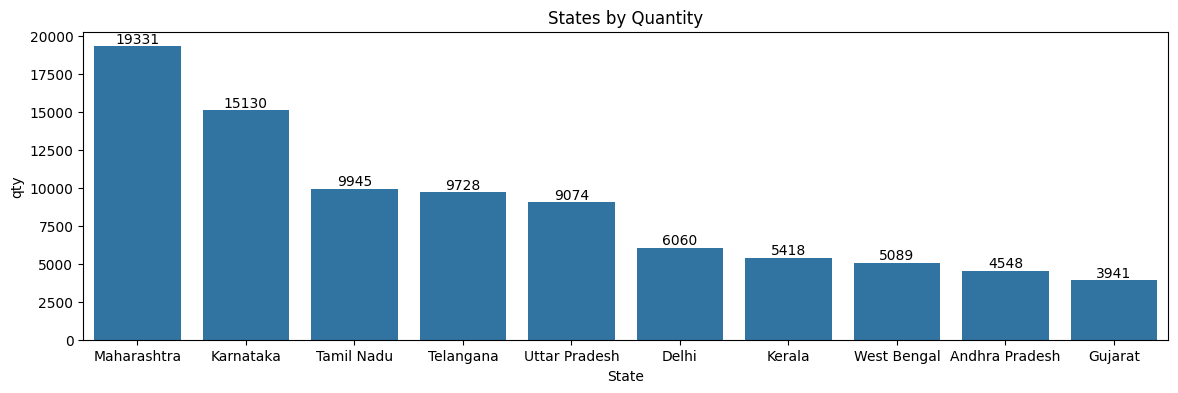

In [223]:
orders_state = df.groupby(["ship_state"], as_index =False)["qty"].sum().sort_values(by="qty",ascending=False).head(10)
plt.figure(figsize=(14,4))
ax = sns.barplot(x ='ship_state',y ='qty', data = orders_state)
plt.title('States by Quantity')
plt.xlabel('State')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

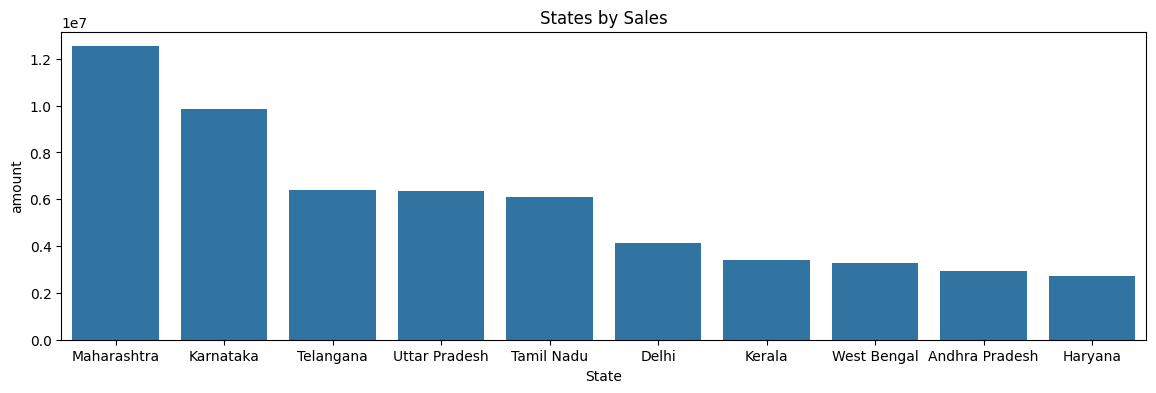

In [224]:
sales_state = df.groupby(["ship_state"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False).head(10)
plt.figure(figsize=(14,4))
sns.barplot(x="ship_state",y="amount",data=sales_state)
plt.title("States by Sales")
plt.xlabel("State")
plt.show()

***Maharashtra and Karnataka are the top-performing states in terms of both sales and quantity, indicating a strong demand and customer base in these regions***

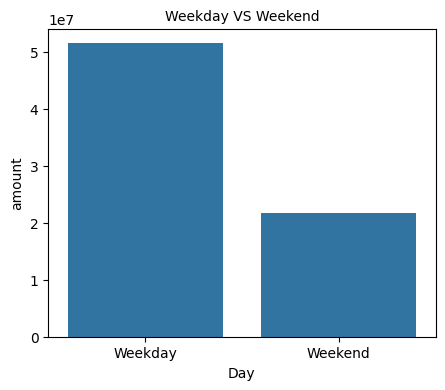

In [196]:
plt.figure(figsize=(5,4))
sale_day = df.groupby(["weekend_weekday"],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
sns.barplot(x='weekend_weekday',y='amount',data=sale_day)
plt.title("Weekday VS Weekend",fontsize=10)
plt.xlabel("Day",fontsize=10)
plt.show()

***Sales are higher on weekdays compared to weekends, indicating stronger customer activity during the workweek***

## Time Series Analysis

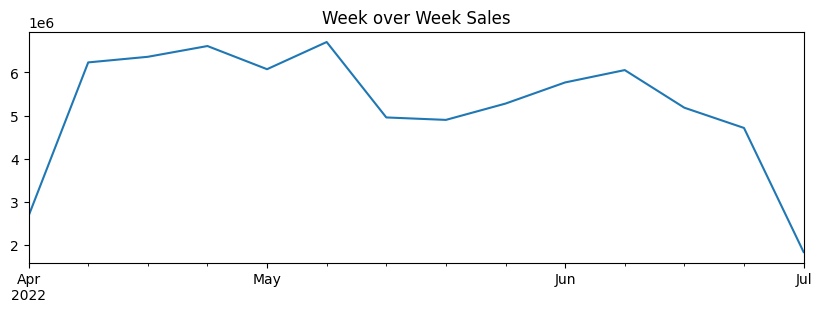

In [197]:
plt.figure(figsize=(10,3))
df.set_index('date').resample('W')["amount"].sum().plot()
plt.title("Week over Week Sales")
plt.xlabel(" ")
plt.show()

***Sales trend fluctuates week over week, peaking around early May and early June. Mid-May and end of June show significant drops, suggesting possible seasonal or operational factors affecting sales***

## Conclusion

*T-shirts and Shirts, especially in sizes M, L, and XL, drive the highest sales, with T-shirts being the most profitable. Amazon dominates order fulfillment, primarily through B2C customers, while B2B sales remain minimal. Bengaluru, Hyderabad, and Mumbai, along with Maharashtra and Karnataka, are the top-performing regions. Sales peak on weekdays, with week-to-week fluctuations indicating possible seasonal or operational effects*

## Recommendations

*Focus inventory on high-demand products and sizes, optimize Amazon fulfillment to reduce cancellations, target promotions in top cities and states, and leverage weekday sales trends to maximize revenue*